## Part 1

In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.DataFrame([[0.5, 1],[np.NaN, 2], [0.2,]])

In [22]:
df

,0,1
0,0.5,1.0
1,NaN,2.0
2,0.2,NaN


### Questions
* Replace Nan in both columns with
* Zero
* max
* min
* mean
* median

In [68]:
max = df.max()
min = df.min()
df1 = df.replace([np.NaN],0)


In [90]:
(df1)

,0,1
0,0.5,1.0
1,0.0,2.0
2,0.2,0.0


In [99]:
max = 0
items = df.max(0)
print(items)
for i in range(len(df.max(0))):
    if(items[i]>max):
        max = items[i]
df2 = df.replace(np.NaN,max)

0    0.5
1    2.0
dtype: float64


In [100]:
(df2)

,0,1
0,0.5,1.0
1,2.0,2.0
2,0.2,2.0


In [105]:
items = df.min(0)
min = items[0]
for i in range(len(df.min(0))):
    if(items[i]<min):
        min = items[i]
df3 = df.replace(np.NaN,min)

In [107]:
df3

,0,1
0,0.5,1.0
1,0.2,2.0
2,0.2,0.2


In [129]:
counter = 0
mean = 0
for i in range(len(df)-1):
    items = df[i]
    for j in range(len(items)):
        if(items[j]!='nan'):
            counter += 1
            mean += items[i]
        
mean = mean/counter
df4 = df.replace(np.NaN,mean)

In [130]:
df4

,0,1
0,0.50,1.00
1,1.25,2.00
2,0.20,1.25


In [132]:
median = df.median()
print(median)

0    0.35
1    1.50
dtype: float64


In [147]:
df5 = df
for i in range(len(df)-1):
    df5 = df5.replace({i:{np.NaN:median[i]}})

In [148]:
df5

,0,1
0,0.50,1.0
1,0.35,2.0
2,0.20,1.5


## Part 2

In [150]:
from sklearn.datasets import load_breast_cancer

In [149]:
from sklearn import svm

In [157]:
data = load_breast_cancer()
df_bc = pd.DataFrame(data.data, columns = data.feature_names)

In [158]:
df_bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [160]:
x = []
for i in range(len(df_bc)):
    x.append(i)

In [212]:
clf = svm.SVC(kernel='linear')
clf.fit(df_bc, x)
values = []
for i, j in df_bc.iteritems():
    values.append(df_bc[i].max())
#values.append(df_bc.max(axis = 0,numeric_only = False))
print(values)
arr = clf.predict([values])


[28.11, 39.28, 188.5, 2501.0, 0.1634, 0.3454, 0.4268, 0.2012, 0.304, 0.09744, 2.873, 4.885, 21.98, 542.2, 0.03113, 0.1354, 0.396, 0.05279, 0.07895, 0.02984, 36.04, 49.54, 251.2, 4254.0, 0.2226, 1.058, 1.252, 0.291, 0.6638, 0.2075]


In [213]:
import matplotlib.pyplot as plt

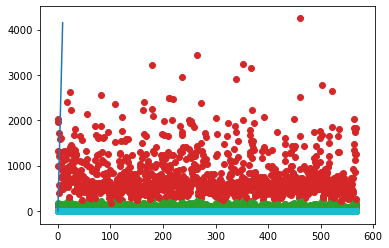

In [227]:
# Shows the best way to cut all the data is with a straight line.
for i,j in df_bc.iteritems():
    plt.scatter(x, df_bc[i])
val = []
for i in range(len(x)):
    val.append(arr*i)
plt.plot(x[:10], val[:10])